In [28]:
import pandas as pd
from thefuzz import process
import json

In [29]:
df = pd.read_excel("bancos_e_agencias.xlsx", sheet_name=0, dtype=str)
print(df.columns.tolist())

['BANCO CENTRAL DO BRASIL - BACEN', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']


In [30]:
# 1) Carrega o Excel e mantém só as duas colunas desejadas
#    Ajuste 'Sheet1' e os nomes de coluna conforme seu arquivo
df = pd.read_excel("bancos_e_agencias.xlsx", sheet_name="Plan1", dtype=str)
df = df[["Unnamed: 3", "Unnamed: 5"]].copy()


In [31]:
# 2) Limpeza básica: tira espaços em branco e normaliza caixa
df["NomeBanco"] = df["Unnamed: 3"].fillna('').astype(str).str.strip().str.lower()
df["Agencia"]  = df["Unnamed: 5"].str.strip()


In [32]:

df.drop(index=[0,1,2,3,4,5,6,7,8,9], inplace=True)
df.head(10)

,Unnamed: 3,Unnamed: 5,NomeBanco,Agencia
10,BANCO DO BRASIL S.A. ...,3,banco do brasil s.a.,3
11,BANCO DO BRASIL S.A. ...,4,banco do brasil s.a.,4
12,BANCO DO BRASIL S.A. ...,5,banco do brasil s.a.,5
13,BANCO DO BRASIL S.A. ...,6,banco do brasil s.a.,6
14,BANCO DO BRASIL S.A. ...,7,banco do brasil s.a.,7
15,BANCO DO BRASIL S.A. ...,8,banco do brasil s.a.,8
16,BANCO DO BRASIL S.A. ...,9,banco do brasil s.a.,9
17,BANCO DO BRASIL S.A. ...,10,banco do brasil s.a.,10
18,BANCO DO BRASIL S.A. ...,11,banco do brasil s.a.,11
19,BANCO DO BRASIL S.A. ...,12,banco do brasil s.a.,12


In [33]:
df.drop(columns=["Unnamed: 3", "Unnamed: 5"], inplace=True)

In [35]:
# 3) Carrega lista oficial de bancos (do seu bancos.json) 
with open("bancos.json", encoding="utf-8") as f:
    oficiais = [nome.lower() for nome in json.load(f).keys()]

In [36]:
def match_banco(nome):
    if not isinstance(nome, str) or not nome:
        return None
    match, score = process.extractOne(nome, oficiais, score_cutoff=80)
    return match
df.head()


,NomeBanco,Agencia
10,banco do brasil s.a.,3
11,banco do brasil s.a.,4
12,banco do brasil s.a.,5
13,banco do brasil s.a.,6
14,banco do brasil s.a.,7


In [37]:
df['BancoOficial'] = df['NomeBanco'].apply(match_banco)
df.head(10)

,NomeBanco,Agencia,BancoOficial
10,banco do brasil s.a.,3,banco do brasil s.a.
11,banco do brasil s.a.,4,banco do brasil s.a.
12,banco do brasil s.a.,5,banco do brasil s.a.
13,banco do brasil s.a.,6,banco do brasil s.a.
14,banco do brasil s.a.,7,banco do brasil s.a.
15,banco do brasil s.a.,8,banco do brasil s.a.
16,banco do brasil s.a.,9,banco do brasil s.a.
17,banco do brasil s.a.,10,banco do brasil s.a.
18,banco do brasil s.a.,11,banco do brasil s.a.
19,banco do brasil s.a.,12,banco do brasil s.a.


In [38]:
df = df.dropna(subset=['BancoOficial'])

In [1]:
agencias_por_banco = (
    df.groupby('BancoOficial')['Agencia']
      .apply(lambda s: sorted(set(s)))
      .to_dict()
)
df.head(100)

NameError: name 'df' is not defined

In [ ]:
mask = df['Agencia'].astype(int) == 0
df = df.drop(df[mask].index)

In [ ]:
import matplotlib.pyplot as plt

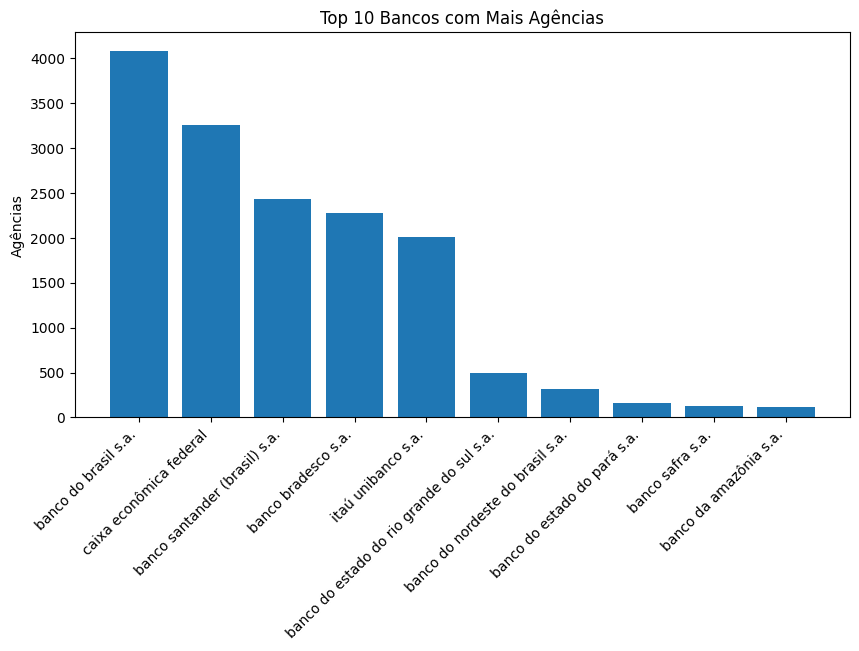

In [ ]:
top10 = counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agências")
plt.title("Top 10 Bancos com Mais Agências")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agências")
plt.title("Top 10 Bancos com Mais Agências")
plt.show()

In [1]:
mask = df['Agencia'].astype(int) == 0
df = df.drop(df[mask].index)

NameError: name 'df' is not defined

In [50]:
# 9) Salva resultados
df[['BancoOficial','Agencia']].to_csv("bancos_e_Agencias.csv", index=False)
with open("agenciasEAgencias.json","w",encoding="utf-8") as f:
    json.dump(agencias_por_banco, f, indent=2, ensure_ascii=False)